In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
worksheet = gc.open('ykdata').sheet1

In [4]:
rows = worksheet.get_all_values()

In [5]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head()

,input,output
0,1.0,11.0
1,2.0,22.0
2,3.0,33.0
3,4.0,44.0
4,5.0,55.0


In [6]:
import pandas as pd


In [7]:
from sklearn.model_selection import train_test_split

In [8]:

from sklearn.preprocessing import MinMaxScaler

In [9]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [11]:
X = df[['input']].values
y = df[['output']].values

In [12]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [13]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)


In [14]:
Scaler = MinMaxScaler()

In [15]:

Scaler.fit(X_train)

MinMaxScaler()

In [16]:

X_train1 = Scaler.transform(X_train)

In [20]:
Ai_Brain=Sequential([
    Dense(units = 7, activation = 'relu', input_shape = [1]),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 3, activation = 'relu'),
    Dense(units = 1)
])

In [21]:
Ai_Brain.compile(optimizer = 'rmsprop', loss = 'mse')


Epoch 1/2000
1/1 [==============================] - 0s 10ms/step - loss: 276.6219
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 275.4544
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 274.2883
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 273.1245
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 271.9624
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 270.8024
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 269.6440
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 268.4878
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 267.3335
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 266.1810
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 265.0306
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 263.8820
Epoch 13/2000
1/1 [====

<Axes: >

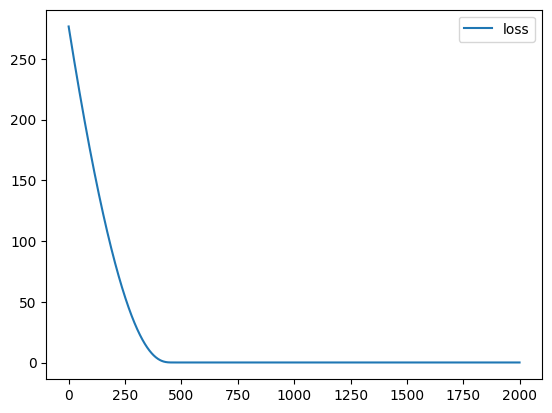

In [23]:
Ai_Brain.fit(X_train1,y_train,epochs = 2000)
loss_df = pd.DataFrame(Ai_Brain.history.history)
loss_df.plot()

In [24]:
loss_df = pd.DataFrame(Ai_Brain.history.history)



<Axes: >

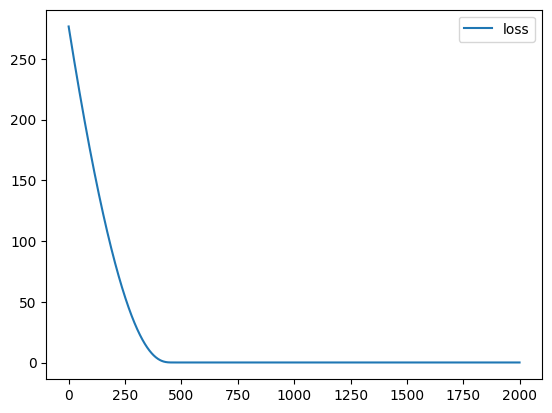

In [25]:
loss_df.plot()


In [28]:
X_test1 = Scaler.transform(X_test)
Ai_Brain.evaluate(X_test1,y_test)


1/1 [==============================] - 0s 21ms/step - loss: 0.0079


0.007888886146247387

In [29]:
X_n1 = [[33]]
X_n1_1 = Scaler.transform(X_n1)
Ai_Brain.predict(X_n1_1)

1/1 [==============================] - 0s 18ms/step


array([[362.28854]], dtype=float32)